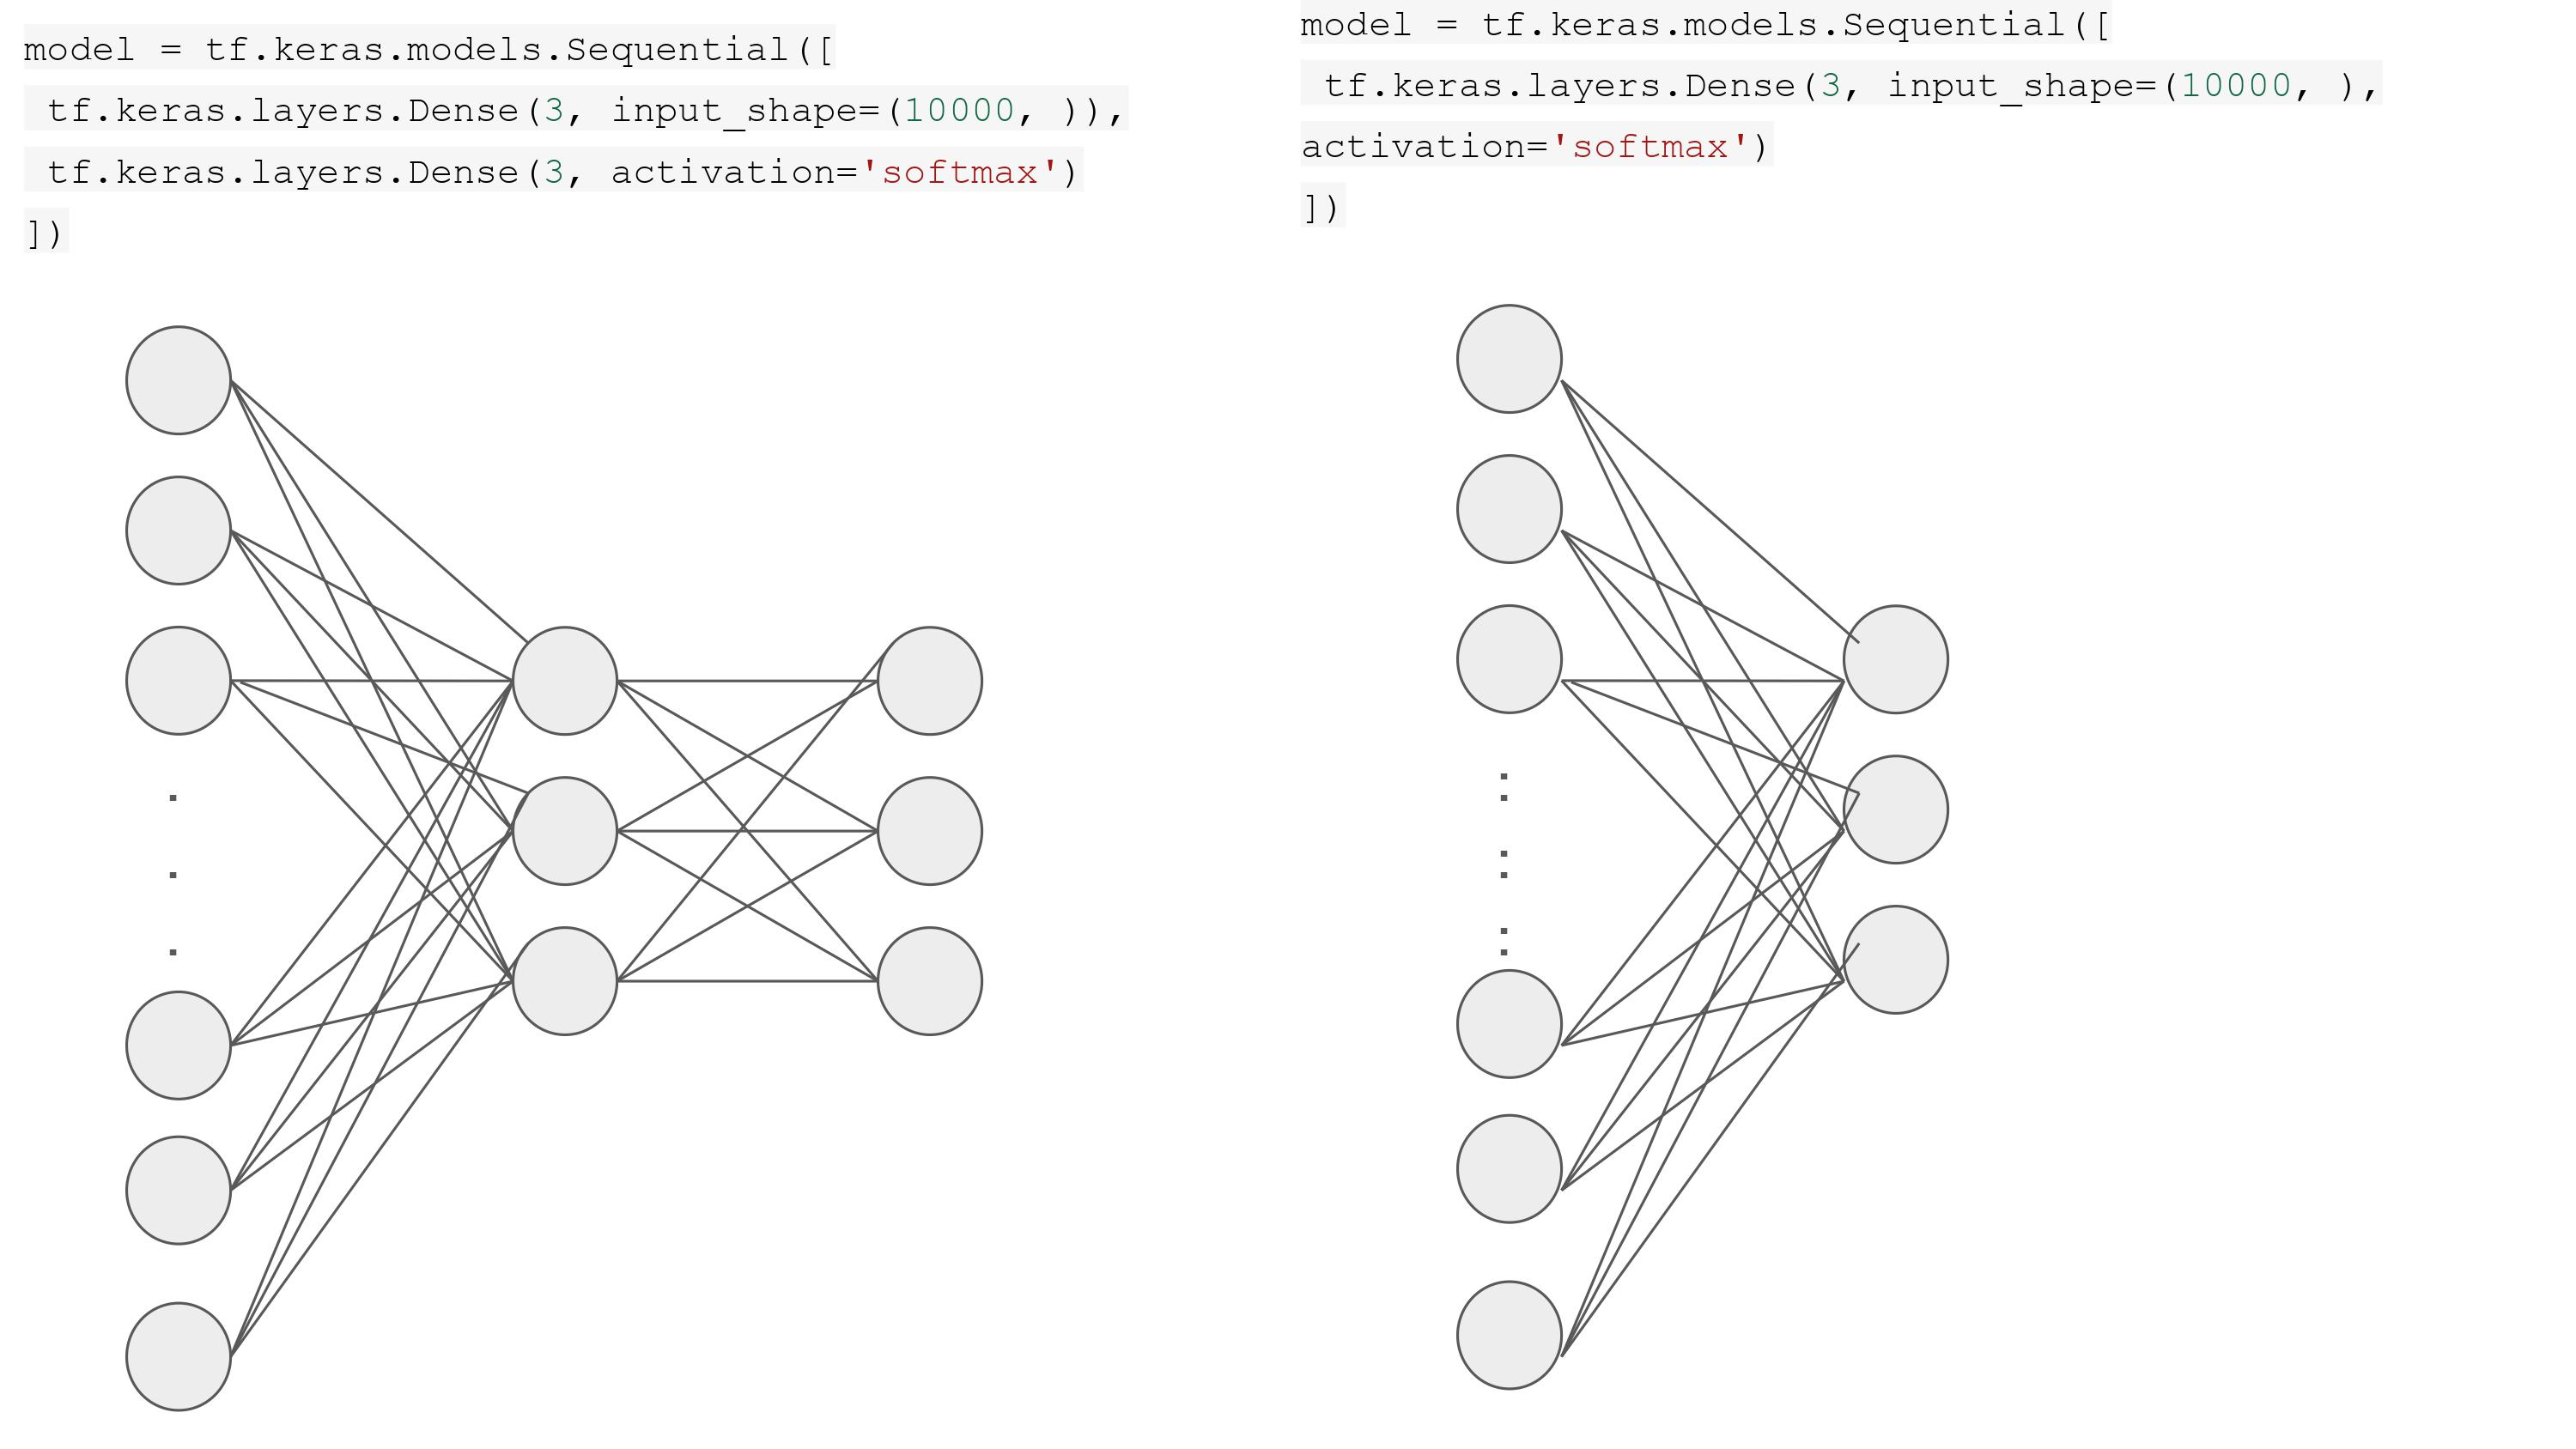

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
# from pyESN.pyESN import ESN

In [5]:
# mat = scipy.io.loadmat('EQ13_data.mat')
# mat = scipy.io.loadmat('drive/MyDrive/Quantum_reservoir_processing/case2_3nodes.mat')
# mat2 = scipy.io.loadmat('drive/MyDrive/Quantum_reservoir_processing/case2_g2_density_data.mat')
mat = scipy.io.loadmat('case2_3nodes.mat')
mat2 = scipy.io.loadmat('case2_g2_density_data.mat')
n1 = mat['n1_selected']
n2 = mat['n2_selected']
n3 = mat['n3_selected']
g2 = mat['g2']
n = mat2['n_m']
r = mat['r']


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_12616\3796786989.py:12: SyntaxWarning: invalid escape sequence '\d'
  ax2.set_ylabel('$<a^{\dagger}a>$', color=color)  # we already handled the x-label with ax1


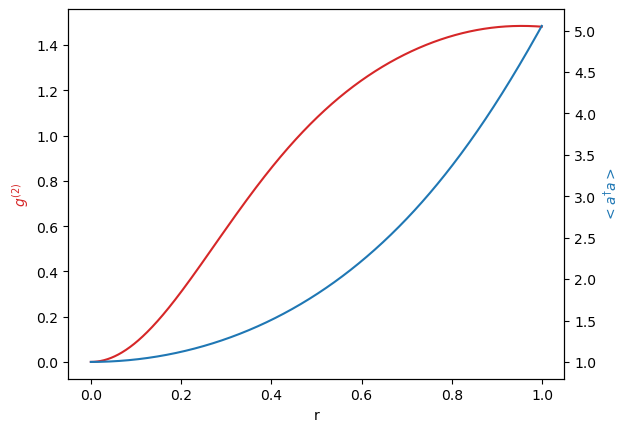

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('r')
ax1.set_ylabel('$g^{(2)}$', color=color)
ax1.plot(r[0], g2[0], color=color)
# ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$<a^{\dagger}a>$', color=color)  # we already handled the x-label with ax1
ax2.plot(r[0], n[0], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

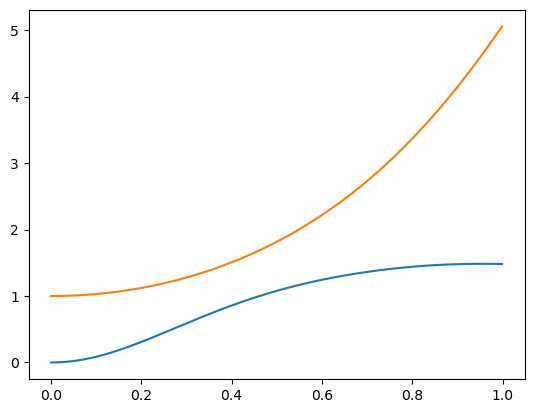

In [9]:
plt.plot(r[0],g2[0])
plt.plot(r[0],n[0])

# Normalization with each sample or whole sample

# 3 nodes and pick more points

In [12]:
len(n1[0][0][0])
# n1[0][0]

20

In [22]:
g2_re = []
ns = []
number = 1000
r = np.arange(0, 1, 0.001)
for i in range(number):
# for i in range(np.shape(n1)[1]):
    # input_ = np.concatenate((np.reshape(n1[0][i],len(n1[0][0][0])), np.reshape(n2[0][i],len(n2[0][0][0])),  np.reshape(n3[0][i],len(n3[0][0][0]))) )
    input_ = np.concatenate((np.reshape(n1[0][i],len(n1[0][0][0])), np.reshape(n2[0][i],len(n2[0][0][0])) ))
    # input = input/sum(input)
    ns.append(input_)
    g2_re.append({g2[0][i]:r[i]})
    # g2_re.append(g2[0][i])


In [24]:
X = np.array(ns)
# Y = np.reshape(g2_re,(number,1))
Y = g2_re
# X, Y = shuffle(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [26]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []

for ele in Y_train:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))


for ele in Y_test:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))

In [28]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train_g2)
sc_train = regressor.score(X_train, Y_train_g2)
sc_test = regressor.score(X_test, Y_test_g2)
print([sc_train, sc_test])
Y_predict_RFR = regressor.predict(X_test)


C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.9999988885332807, 0.9999924185722795]


2.152209691080344e-06


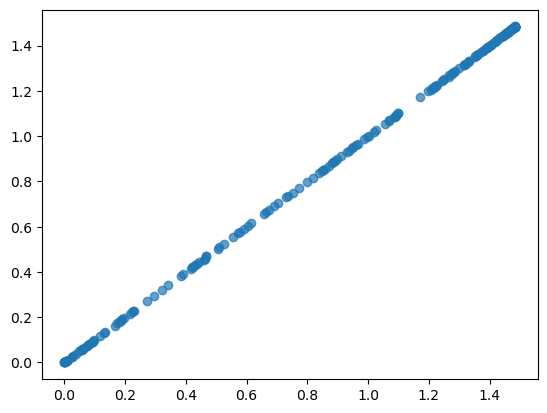

In [29]:
error = mean_squared_error(Y_test_g2,Y_predict_RFR)
print(error)
plt.scatter(Y_test_g2, Y_predict_RFR, alpha=0.7, label="Predicted vs True")

Text(0, 0.5, 'g2')

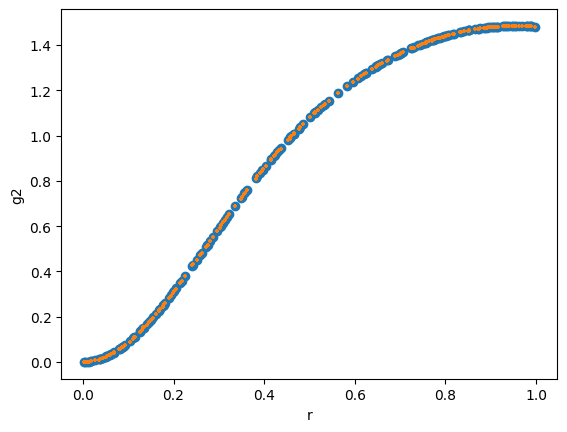

In [ ]:
# plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=5)
plt.xlabel('r')
plt.ylabel('g2')
# plt.ylim([0,5])
# plt.title('reservoir+ESN')

In [ ]:
Y_predict[0:3]

array([[1.3997811],
       [1.4509088],
       [1.1400539]], dtype=float32)

In [ ]:
Y_test_g2[0:3]

array([[1.40417956],
       [1.45318543],
       [1.13874768]])

Text(0, 0.5, 's_predict')

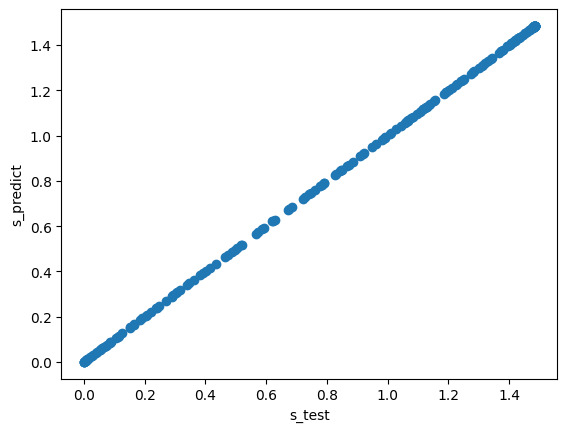

In [ ]:
# plt.subplot(2,1,1)
plt.scatter(Y_test_g2[:,0], Y_predict_linear_regression[:,0])
# plt.ylim([0.7, 0.9])
# plt.xlim([0.7, 0.9])
plt.xlabel('s_test')
plt.ylabel('s_predict')
# plt.subplot(2,1,2)


Text(0.5, 1.0, '3 nodes')

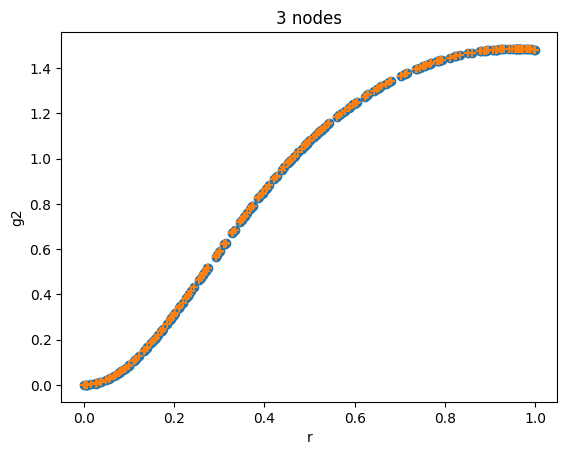

In [ ]:
plt.scatter(Y_test_r, Y_test_g2[:,0])
plt.scatter(Y_test_r, Y_predict_linear_regression[:,0],marker="+")
plt.xlabel('r')
plt.ylabel('g2')
plt.title('3 nodes')

In [ ]:
Y_test

array([[1.3657449 , 0.72480105],
       [0.88661569, 0.88740816],
       [6.20486916, 5.3590614 ],
       [0.82318468, 0.89285348],
       [0.90948839, 3.2148959 ],
       [0.73824396, 0.85195015],
       [4.582803  , 0.95297262],
       [0.70370536, 0.88663819],
       [0.73930391, 0.83871482],
       [0.82068116, 0.83352823],
       [0.80073825, 0.79574036],
       [0.50738605, 0.43914094],
       [3.4459187 , 2.46818196],
       [0.81798848, 0.84907697],
       [0.55853134, 4.93295755],
       [0.73498707, 0.77118091],
       [0.89178885, 0.81910396],
       [0.84299569, 0.74371575],
       [0.77008721, 0.75403768],
       [5.40386751, 5.00587227],
       [0.87982348, 0.82969598],
       [0.80196238, 0.70389569],
       [0.53981852, 2.0701035 ],
       [0.8713874 , 0.87816948],
       [0.86662167, 0.85404955],
       [1.11502837, 5.05980824],
       [1.43336145, 2.76823635],
       [0.81955564, 0.84412045],
       [0.89709552, 0.86852969],
       [0.76458307, 0.70502892],
       [2.